In [1]:
cd ..

/Users/jibanmac/Documents/GitHub/matter_emu_dgmgp


In [2]:
import os

from matter_multi_fidelity_emu.plottings.validation_loader import ValidationLoader
from matter_multi_fidelity_emu.data_loader import folder_name


from examples.make_plots_pipeline import PreloadedVloaders

In [3]:
import numpy as np
import h5py
import json
import glob
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# change some plotting defaults
# plt.rc('xtick',labelsize=26)
# plt.rc('ytick',labelsize=26)
# plt.rcParams['xtick.major.size'] = 8
# plt.rcParams['xtick.major.width'] = 1.5
# plt.rcParams['xtick.minor.size'] = 5
# plt.rcParams['xtick.minor.width'] = 1.25
# plt.rcParams['ytick.major.size'] = 8
# plt.rcParams['ytick.major.width'] = 1.5
# plt.rcParams['ytick.minor.size'] = 5
# plt.rcParams['ytick.minor.width'] = 1.25
# plt.rcParams['axes.linewidth'] = 2
matplotlib.rcParams.update(
    {"font.size": 16, "axes.labelsize": 24, "axes.titlesize": 18, "text.usetex": True,
    "xtick.major.width": 1.5, "xtick.minor.width": 1.2, "ytick.major.width": 1.5, "ytick.minor.width": 1.2,
    "legend.fontsize": 18}
)

# colors to use
c_flatirons = '#8B2131'
c_sunshine = '#CA9500'
c_skyline = '#1D428A'
c_midnight = '#0E2240'

colors = [c_flatirons, c_sunshine, c_skyline, c_midnight]

# useful throughout
base_dir = '/Users/jibanmac/Documents/GitHub/matter_emu_dgmgp/data/'
emudir = '/Users/jibanmac/Documents/GitHub/matter_emu_dgmgp/data/dmo_60_res128box256/'
imgdir = '/Users/jibanmac/Documents/Latex/mf_boxsize_paper/images/'
zz = np.array([0, 0.2, 0.5, 1.0, 2.0, 3.0])
test = h5py.File(emudir+'cc_emulator_powerspecs.hdf5', 'r')
kf_test = test['kfmpc'][:]
test.close()

# SLHD versus Not using Slices

In [4]:
vloaders = PreloadedVloaders()

 /Users/jibanmac/Documents/GitHub/matter_emu_dgmgp/matter_multi_fidelity_emu/plottings/validation_loader.py:149: RuntimeWarning:overflow encountered in power
 /Users/jibanmac/Documents/GitHub/matter_emu_dgmgp/matter_multi_fidelity_emu/plottings/validation_loader.py:133: RuntimeWarning:invalid value encountered in divide


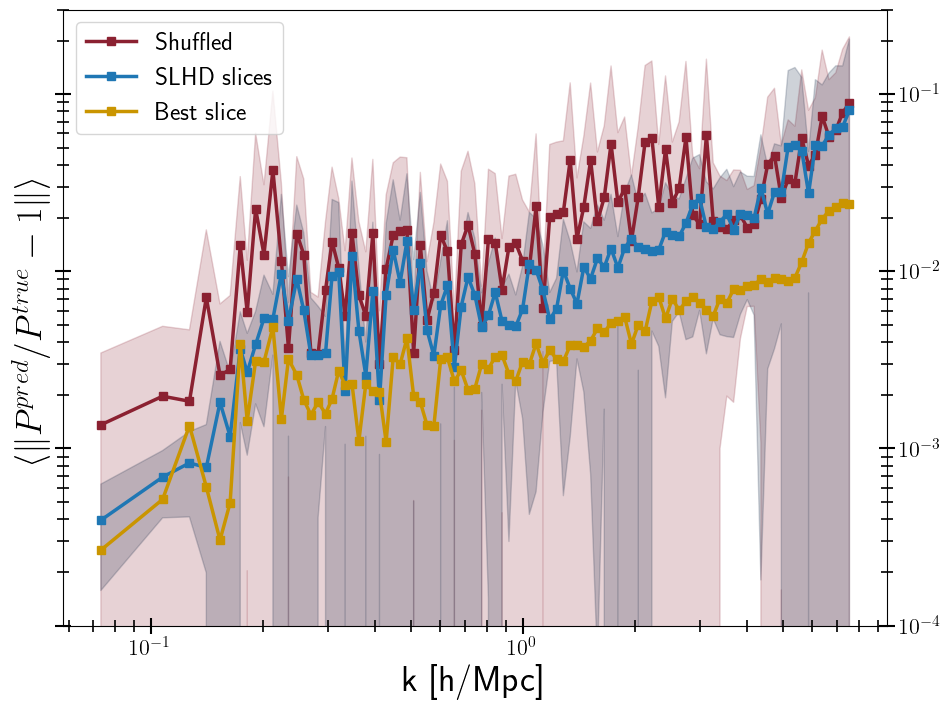

In [29]:
############################ SLHD versus not using slices ############################
# 5, 41, 57,
# xx 39, 15, 8,
# 7, 11, 4,
# 3, 59, 12,
# xx 16, 9, 14,
# 40, 0, 1,
# xx 10, 17, 6,
# 58, 2, 13

not_slhd_slices = [
    [5, 41, 57],
    [4, 7, 11],
    [3, 12, 59],
    [0, 1, 40],
    [2, 13, 58]
]

not_slhd_error = []

for slice_name in not_slhd_slices:
    vloader = getattr(vloaders, "dgmgp_L60_L2box100_H3_z0_1_2_slice_{}".format("_".join(map(str, slice_name))))

    not_slhd_error.append(
        vloader.relative_errors.mean(axis=(0, 1))
    )


    
## SLHD slices
slhd_slices = [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [9, 10 ,11],
    [12, 13, 14],
    [39, 40, 41],
    [57, 58, 59],
]

slhd_error = []

for slice_name in slhd_slices:
    vloader = getattr(vloaders, "dgmgp_L60_L2box100_H3_z0_1_2_slice_{}".format("_".join(map(str, slice_name))))

    slhd_error.append(
        vloader.relative_errors.mean(axis=(0, 1))
    )


fig, ax = plt.subplots(figsize=(10.625, 8), nrows=1, ncols=1, sharey=True)

# (z bins, test sims, k bins)
ax.loglog(
    10**vloader.kf[0],
    np.mean(not_slhd_error, axis=0),
    's-',
    lw=2.5,    
    label="Shuffled",
    color=c_flatirons
)
ax.fill_between(
    10**vloader.kf[0],
    np.mean(not_slhd_error, axis=0) - np.std(not_slhd_error, axis=0),
    np.mean(not_slhd_error, axis=0) + np.std(not_slhd_error, axis=0),
    color=c_flatirons,
    alpha=0.2,
)
ax.loglog(
    10**vloader.kf[0],
    np.mean(slhd_error, axis=0),
    's-',
    lw=2.5,    
    label="SLHD slices"
)
ax.fill_between(
    10**vloader.kf[0],
    np.mean(slhd_error, axis=0) - np.std(slhd_error, axis=0),
    np.mean(slhd_error, axis=0) + np.std(slhd_error, axis=0),
    color=c_midnight,
    alpha=0.2,
)



# Best
ax.loglog(
    10**vloaders.dgmgp_L60_H3_z0_1_2_slice_19.kf[0],
    vloaders.dgmgp_L60_H3_z0_1_2_slice_19.relative_errors.mean(axis=(0, 1)),
    's-',
    lw=2.5,    
    label="Best slice",
    color=c_sunshine,
    
)
ax.set_ylim(1e-4, 0.3)
ax.legend()

ax.set_xlabel(r'k [h/Mpc]', fontsize=26)
ax.set_ylabel(r'$\langle\| P^{{pred}}/P^{{true}} - 1 \|\rangle$', fontsize=26)


## Martin's settings
ax.tick_params(which='both', direction='inout', right=True, labelright=True, labelleft=False, length=12)
ax.tick_params(which='minor', length=8, labelright=False, labelleft=False)

fig.patch.set_facecolor('none')
fig.subplots_adjust(hspace=0, wspace=0)
fig.savefig(
    os.path.join(imgdir, "slhd_versus_not_slhd.pdf"),
    bbox_inches='tight', pad_inches=0.075
)
plt.show()

Slices comparison

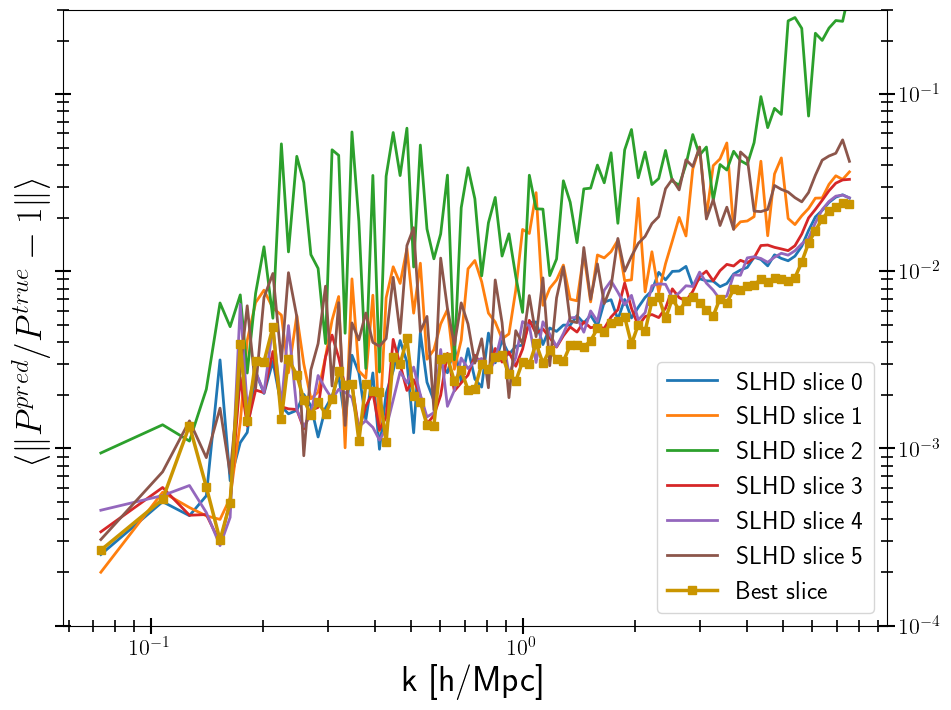

In [46]:

fig, ax = plt.subplots(figsize=(10.625, 8), nrows=1, ncols=1, sharey=True)

for i in range(6):
    # (z bins, test sims, k bins)
    ax.loglog(
        10**vloader.kf[0],
        slhd_error[i],
#         not_slhd_error[i],
#         's-',
        lw=2,
        label="SLHD slice {}".format(i),
#         color=c_skyline
    )

# for i in range(5):
#     # (z bins, test sims, k bins)
#     ax.loglog(
#         10**vloader.kf[0],
# #         slhd_error[i],
#         not_slhd_error[i],
# #         's-',
#         lw=2,
#         label="not SLHD slice {}".format(i),
#         color=c_flatirons
        
#     )



# Best
ax.loglog(
    10**vloaders.dgmgp_L60_H3_z0_1_2_slice_19.kf[0],
    vloaders.dgmgp_L60_H3_z0_1_2_slice_19.relative_errors.mean(axis=(0, 1)),
    's-',
    lw=2.5,    
    label="Best slice",
    color=c_sunshine,
    
)
ax.set_ylim(1e-4, 0.3)
ax.legend()

ax.set_xlabel(r'k [h/Mpc]', fontsize=26)
ax.set_ylabel(r'$\langle\| P^{{pred}}/P^{{true}} - 1 \|\rangle$', fontsize=26)


## Martin's settings
ax.tick_params(which='both', direction='inout', right=True, labelright=True, labelleft=False, length=12)
ax.tick_params(which='minor', length=8, labelright=False, labelleft=False)

fig.patch.set_facecolor('none')
fig.subplots_adjust(hspace=0, wspace=0)
fig.savefig(
    os.path.join(imgdir, "slhd_slices.pdf"),
    bbox_inches='tight', pad_inches=0.075
)
plt.show()

Using AR1 or NARGP

In [18]:
vloaders.dgmgp_L60_L2box100_H3_z0_1_2_slice_6_7_8.relative_errors.mean(axis=(1, 2))

array([0.05638254, 0.02775227, 0.02260588, 0.03159256, 0.02977599,
       0.14162828])

In [8]:
np.mean(slhd_error, axis=1)

array([0.00639146, 0.01335468, 0.05162292, 0.00661149, 0.00628839,
       0.01420857, 0.00526323])

In [12]:
np.mean(not_slhd_error, axis=1)

array([0.00541353, 0.00919152, 0.00630144, 0.00661329, 0.08535759])